<a href="https://colab.research.google.com/github/majid1363/majid1363/blob/main/Custom_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Linear Layer

In [ ]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, units, input_shape):
        super(Linear, self).__init__()

        self.w = self.add_weight(
            shape=(input_shape[-1], units),
            initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(units,),
            initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
            trainable=True,
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [ ]:
x = tf.ones((2, 2))
linear_layer = Linear(4, x.shape)
y = linear_layer(x)
print(y)

tf.Tensor(
[[-0.1219431  -0.05193181 -0.10644008 -0.05279358]
 [-0.1219431  -0.05193181 -0.10644008 -0.05279358]], shape=(2, 4), dtype=float32)


In [ ]:
linear_layer.weights

[<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.03197147, -0.00935029, -0.04142277, -0.00936618],
        [-0.05800017, -0.03323123, -0.02359455, -0.03406122]],
       dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([-0.03197147, -0.00935029, -0.04142277, -0.00936618], dtype=float32)>]

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

# Convert class vectors to binary class matrices.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=x_train[0].shape))
model.add(tf.keras.layers.Flatten())
model.add(Linear(256, (784,)))
model.add(tf.keras.layers.ReLU())
model.add(Linear(10, (256,)))
model.summary()

# compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
linear_8 (Linear)            (None, 256)               200960    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 256)               0         
_________________________________________________________________
linear_9 (Linear)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0343 - accuracy: 0.8560 - val_loss: 0.0128 - val_accuracy: 0.9619
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0117 - accuracy: 0.9667 - va

### build method

In [ ]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
            trainable=True,
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=x_train[0].shape))
model.add(tf.keras.layers.Flatten())
model.add(Linear(256))
model.add(tf.keras.layers.ReLU())
model.add(Linear(10))
model.summary()

# compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
linear_10 (Linear)           (None, 256)               200960    
_________________________________________________________________
re_lu_4 (ReLU)               (None, 256)               0         
_________________________________________________________________
linear_11 (Linear)           (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0345 - accuracy: 0.8538 - val_loss: 0.0126 - val_accuracy: 0.9631
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0116 - accuracy: 0.9674 - va

# Gradient Reversal Layer

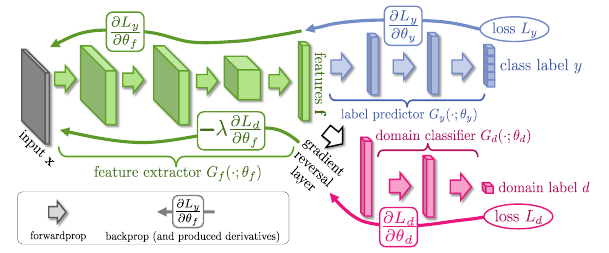

Ganin, Yaroslav, and Victor Lempitsky. "Unsupervised domain adaptation by backpropagation." International conference on machine learning, 2015.

In [ ]:
# Define gradient reversal layer
@tf.custom_gradient
def gradient_reversal(x):
    out = tf.identity(x)
    def grad_fn(dy):
        return -1. * dy
    return out, grad_fn

class GradientReversalLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(GradientReversalLayer, self).__init__()

    def call(self, x):
        return gradient_reversal(x)

In [ ]:
gr_layer = GradientReversalLayer()

In [ ]:
x = tf.constant([[1., 2], [3, 4]])
y = gr_layer(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x * x

dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(
[[ 3. 12.]
 [27. 48.]], shape=(2, 2), dtype=float32)


In [ ]:
with tf.GradientTape() as g:
    g.watch(x)
    y = gr_layer(x)

dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(
[[-1. -1.]
 [-1. -1.]], shape=(2, 2), dtype=float32)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=x_train[0].shape))
model.add(tf.keras.layers.Flatten())
model.add(Linear(256))
model.add(tf.keras.layers.ReLU())
model.add(Linear(10))
model.add(GradientReversalLayer())
model.summary()

# compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=10,
                    shuffle=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
linear_15 (Linear)           (None, 256)               200960    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 256)               0         
_________________________________________________________________
linear_16 (Linear)           (None, 10)                2570      
_________________________________________________________________
gradient_reversal_layer_5 (G (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0350 - accuracy: 0.8518 - val_loss: 0.